
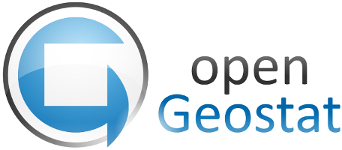

In [1]:
import pygslib
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# read surpac string
surpac = pygslib.surpac.Surpac('surpac_strings.txt')

In [3]:
# print string properties
print ('location: {}'.format(surpac.location))
print ('date: {}'.format(surpac.date))
print ('purpose: {}'.format(surpac.purpose))
print ('memo: {}'.format(surpac.memo))
print ('axis: {}'.format(surpac.axis.string))
print ('axis1: {} {} {}'.format(surpac.axis.x_1,surpac.axis.y_1,surpac.axis.z_1))
print ('axis2: {} {} {}'.format(surpac.axis.x_2,surpac.axis.y_2,surpac.axis.z_2))

location: smp
date: 8-Feb-94
purpose: 
memo: Sample string file
axis: 0.0
axis1: 2440.0 6740.0 152.541
axis2: 2440.0 6830.0 152.541


In [4]:
# Iterate on data
 for r in surpac.records:
        # record ID
        print(r.number, len(r.string_record))


1 18
2 15
2 15
93 3


In [5]:
# access data
print('string ID: ',surpac.records[0].number)
print('x, y, z: ',surpac.records[0].string_record[5].x, surpac.records[0].string_record[5].y, surpac.records[0].string_record[5].z)
print('num of variables: ',surpac.records[0].string_record[5].length_d)
n=surpac.records[0].string_record[5].length_d
print('variables values: ', surpac.records[0].string_record[5].d[:n])

string ID:  1
x, y, z:  2420.0 6755.85 155.398
num of variables:  3
variables values:  ['point2', 'second description field', 'third']


In [6]:
# get point data
x = []
y = []
z = []
pid = []
strn = []
line = []
l = -1
for r in surpac.records:
    # record ID
    l=l+1
    for i in range(len(r.string_record)):
        pid.append(i)
        strn.append(r.number)
        line.append(l)
        x.append(r.string_record[i].x)
        y.append(r.string_record[i].y)
        z.append(r.string_record[i].z)
            

In [7]:
data = pd.DataFrame({'x':x,'y':y,'z':z,'p':pid,'s':strn, 'l':line})
data

,x,y,z,p,s,l
0,2443.66,6749.12,155.249,0,1,0
1,2440.60,6747.52,155.184,1,1,0
2,2431.75,6746.43,155.173,2,1,0
3,2428.57,6747.60,155.174,3,1,0
4,2421.92,6751.69,155.245,4,1,0
5,2420.00,6755.85,155.398,5,1,0
6,2418.62,6762.34,155.593,6,1,0
7,2417.38,6774.82,155.708,7,1,0
8,2417.74,6823.88,155.566,8,1,0
9,2438.58,6822.65,156.611,9,1,0


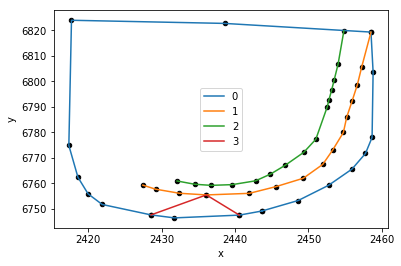

In [8]:
fig, axis = plt.subplots()
# plot points
data.plot.scatter(x='x',y='y', c = 'k', ax = axis)
#plot lines
for l in data['l'].unique():
    data.loc[data['l']==l].plot.line(x='x', y='y', ax = axis)

axis.legend(data['l'].unique())